# Tidying Data and Preliminary Exploration #

Load packages:

In [1]:
install.packages("janitor")

library("tidyverse")
library("stringr")
library("janitor")
library("tidymodels")

set.seed(1000)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ─

# Tidying Data #

Reading proteome and clinical data, then cleaning data:

In [2]:
# reading the proteome and clinical data CSVs
proteome_data <- read_csv("Original_Datasets/77_cancer_proteomes_CPTAC_itraq.csv")
clinical_data <- read_csv("Original_Datasets/clinical_data_breast_cancer.csv") 

# cleaning column names in clinical data
clinical_data <- clean_names(clinical_data)

# Two of C8-A131, AO-A12B, and AO-A12D IDs in the proteomic data, but only one ID specified in the clinical data - remove these donor columns
proteome_data_unique_donors <- select(proteome_data, -c("C8-A131.01TCGA", "C8-A131.32TCGA", "AO-A12D.01TCGA", "AO-A12D.05TCGA", "AO-A12B.01TCGA", "AO-A12B.34TCGA"))
# 77 unique donors (including 3 healthy donors)

Rows: 12553 Columns: 86
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): RefSeq_accession_number, gene_symbol, gene_name
dbl (83): AO-A12D.01TCGA, C8-A131.01TCGA, AO-A12B.01TCGA, BH-A18Q.02TCGA, C8...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 105 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): Complete TCGA ID, Gender, ER Status, PR Status, HER2 Final Status,...
dbl (13): Age at Initial Pathologic Diagnosis, Days to Date of Last Contact,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Change complete_tcga_id in clinical and proteome data sets to uniform format.

In [3]:
# clinical data: change complete_tcga_id to uniform format
clinical_data[c("tcga", "tcga_code_1", "tcga_code_2")] <- str_split_fixed(clinical_data$complete_tcga_id, "-", 3)
clinical_data$tcga_id <- paste(clinical_data$tcga_code_1, clinical_data$tcga_code_2, sep = "-")
clinical_data_tidy <- clinical_data[-c(1, 31:33)] |> relocate(tcga_id, .before = gender)
clinical_data_tidy

# proteome data: convert the TCGA ID columns into a single column called complete_tcga_id
proteome_data_longer <- pivot_longer(proteome_data_unique_donors, 4:80, names_to = "complete_tcga_id", values_to = "protein_expression_log2_iTRAQ_ratios")
# proteome data: change complete_tcga_id to uniform format
proteome_data_longer[c("tcga_id", "tcga_id_2")] <- str_split_fixed(proteome_data_longer$complete_tcga_id, "\\.", 2)
proteome_data_longer_tidy <- proteome_data_longer[-c(4, 7)] |> relocate(tcga_id, .before = RefSeq_accession_number)

tcga_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor_t1_coded,node,node_coded,⋯,pam50_m_rna,sig_clust_unsupervised_m_rna,sig_clust_intrinsic_m_rna,mi_rna_clusters,methylation_clusters,rppa_clusters,cn_clusters,integrated_clusters_with_pam50,integrated_clusters_no_exp,integrated_clusters_unsup_exp
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,⋯,Basal-like,0,-13,3,5,Basal,3,2,2,2
A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,⋯,Basal-like,-12,-13,4,4,Basal,4,2,1,1
BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,⋯,Basal-like,-12,-13,5,5,Basal,1,2,2,2
BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,⋯,Basal-like,-12,-13,5,5,Basal,1,2,2,2
BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,⋯,Basal-like,0,-13,5,5,Basal,1,2,2,2
A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,T_Other,N0,Negative,⋯,Basal-like,0,-13,5,5,Basal,1,2,2,2
D8-A142,FEMALE,74,Negative,Negative,Negative,T3,T_Other,N0,Negative,⋯,Basal-like,0,-13,3,5,X,1,2,2,2
A2-A0D0,FEMALE,60,Negative,Negative,Negative,T2,T_Other,N0,Negative,⋯,Basal-like,-12,-13,5,5,Basal,1,2,2,2
AO-A0J6,FEMALE,61,Negative,Negative,Negative,T2,T_Other,N0,Negative,⋯,Basal-like,-12,-13,2,5,Basal,1,2,2,2


Filter clinical data for stage III+ tumor samples.

In [4]:
# filter for stage III+ tumor samples
clinical_data_filtered_tidy <- clinical_data_tidy |> filter(ajcc_stage %in% c("Stage III", "Stage IIIA", "Stage IIIB", "Stage IIIC", "Stage IV"))
clinical_data_filtered_tidy[1:13]

tcga_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor_t1_coded,node,node_coded,metastasis,metastasis_coded,ajcc_stage
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,M1,Positive,Stage IV
BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,M0,Negative,Stage IIIC
AO-A0JL,FEMALE,59,Negative,Negative,Negative,T2,T_Other,N2,Positive,M0,Negative,Stage IIIA
AN-A0AL,FEMALE,41,Negative,Negative,Negative,T4,T_Other,N0,Negative,M0,Negative,Stage IIIB
C8-A131,FEMALE,82,Negative,Negative,Negative,T2,T_Other,N2,Positive,M0,Negative,Stage III
A2-A0T1,FEMALE,55,Negative,Negative,Positive,T3,T_Other,N3,Positive,M0,Negative,Stage IIIC
AO-A0JE,FEMALE,53,Negative,Negative,Positive,T2,T_Other,N2,Positive,M0,Negative,Stage IIIA
A8-A09G,FEMALE,79,Positive,Negative,Positive,T3,T_Other,N3,Positive,M0,Negative,Stage IIIC
C8-A12Q,FEMALE,78,Negative,Negative,Positive,T1,T1,N2,Positive,M0,Negative,Stage IIIA


Merge filtered clinical data (stage III+ tumors only) and proteome data - these data will be used to identify the top 10 most highly expressed proteins in stage III+ breast cancer.

In [5]:
proteome_and_clinical_data_filtered_tidy <- merge(proteome_data_longer_tidy, clinical_data_filtered_tidy, by="tcga_id")

## Final Outputs: Tidying Data ##

In [6]:
#clinical_data_tidy
#proteome_data_longer_tidy
#proteome_and_clinical_data_filtered_tidy

# Finding Top 10 Most Highly Expressed Proteins in Stage III+ Breast Cancer #

Determine top 10 most highly expressed proteins, when expression is averaged across all the AJCC stage III+ tumors in the unsplit data set:

In [7]:
# filter for stage III+ cancer, average protein expression for each gene across all donors, and determine top 10 most highly expressed proteins
top_10_mean_protein_expression_genes_stage_III_plus <- proteome_and_clinical_data_filtered_tidy |>
  group_by(RefSeq_accession_number) |>
  summarize(mean_protein_expression_log2_iTRAQ_ratios = mean(protein_expression_log2_iTRAQ_ratios, na.rm = TRUE)) |>
  arrange(desc(mean_protein_expression_log2_iTRAQ_ratios)) |>
  slice(1:10)

# create gene_symbol and gene_name labels for the RefSeq_accession_number
labels <- proteome_and_clinical_data_filtered_tidy |>
  filter(ajcc_stage == "Stage IV") |>
  group_by(RefSeq_accession_number) |>
  summarize(gene_symbol = gene_symbol,
            gene_name = gene_name)

# merge labels and top 10 proteins to label RefSeq_accession_number results
top_10_mean_protein_expression_genes_stage_III_plus <- merge(labels, top_10_mean_protein_expression_genes_stage_III_plus, by="RefSeq_accession_number")
top_10_mean_protein_expression_genes_stage_III_plus <- arrange(top_10_mean_protein_expression_genes_stage_III_plus, desc(mean_protein_expression_log2_iTRAQ_ratios))

top_10_mean_protein_expression_genes_stage_III_plus

RefSeq_accession_number,gene_symbol,gene_name,mean_protein_expression_log2_iTRAQ_ratios
<chr>,<chr>,<chr>,<dbl>
NP_055324,SERHL2,serine hydrolase-like protein 2,3.492591
NP_004475,GPC3,glypican-3 isoform 2 precursor,3.271678
NP_003595,IRS4,insulin receptor substrate 4,3.120460
NP_001158090,GPC3,glypican-3 isoform 3 precursor,3.016398
NP_001906,CYB561,cytochrome b561,2.809282
NP_064618,C17ORF48,manganese-dependent ADP-ribose/CDP-alcohol diphosphatase,2.610625
NP_004377,NCAN,neurocan core protein precursor,2.579557
NP_001138582,NELL2,protein kinase C-binding protein NELL2 isoform d,2.542564
NP_079203,PLEKHH3,pleckstrin homology domain-containing family H member 3 precursor,2.517446


### The expression levels of these 10 proteins will be used as parameters in our classifier. ###

## Final Outputs: Finding Top 10 Most Highly Expressed Proteins in Stage III+ Breast Cancer ##

In [27]:
#top_10_mean_protein_expression_genes_stage_III_plus
write.csv(top_10_mean_protein_expression_genes_stage_III_plus, "Proposal/Outputs/top_10_mean_protein_expression_genes_stage_III_plus.csv")

# Filter Tidy Data for Top 10 Most Highly Expressed Proteins in Stage III+ Breast Cancer #

The filtered tidy data will be used for training and testing our classifier.

In [9]:
top_10_mean_protein_expression_genes_stage_III_plus_list = as.list(top_10_mean_protein_expression_genes_stage_III_plus[1])
top_10_mean_protein_expression_genes_stage_III_plus_list

list = c('NP_055324', 'NP_004475', 'NP_003595', 'NP_001158090', 'NP_001906', 'NP_064618', 'NP_004377', 'NP_001138582', 'NP_079203', 'NP_150375')

# filter proteome data for 10 proteins identified above, remove NA values
proteome_data_longer_filtered_tidy <- proteome_data_longer_tidy |> filter(RefSeq_accession_number %in% list)

# merge filtered proteome and clinical data
proteome_filtered_and_clinical_data_tidy <- merge(proteome_data_longer_filtered_tidy, clinical_data_tidy, by = "tcga_id")

proteome_filtered_and_clinical_data_tidy[c(1:5, 17)]

$RefSeq_accession_number
 [1] "NP_055324"    "NP_004475"    "NP_003595"    "NP_001158090" "NP_001906"   
 [6] "NP_064618"    "NP_004377"    "NP_001138582" "NP_079203"    "NP_150375"

tcga_id,RefSeq_accession_number,gene_symbol,gene_name,protein_expression_log2_iTRAQ_ratios,ajcc_stage
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
A2-A0CM,NP_079203,PLEKHH3,pleckstrin homology domain-containing family H member 3 precursor,NA,Stage IIA
A2-A0CM,NP_150375,KCNH7,potassium voltage-gated channel subfamily H member 7 isoform 1,NA,Stage IIA
A2-A0CM,NP_055324,SERHL2,serine hydrolase-like protein 2,NA,Stage IIA
A2-A0CM,NP_004377,NCAN,neurocan core protein precursor,NA,Stage IIA
A2-A0CM,NP_003595,IRS4,insulin receptor substrate 4,NA,Stage IIA
A2-A0CM,NP_001138582,NELL2,protein kinase C-binding protein NELL2 isoform d,NA,Stage IIA
A2-A0CM,NP_064618,C17ORF48,manganese-dependent ADP-ribose/CDP-alcohol diphosphatase,NA,Stage IIA
A2-A0CM,NP_001906,CYB561,cytochrome b561,-1.4472364,Stage IIA
A2-A0CM,NP_004475,GPC3,glypican-3 isoform 2 precursor,NA,Stage IIA


Verify that you have 74 samples and 10 genes per sample.

In [10]:
number_of_patients <- proteome_filtered_and_clinical_data_tidy |>
  group_by(tcga_id) |>
  summarise(genes=n())
number_of_patients

tcga_id,genes
<chr>,<int>
A2-A0CM,10
A2-A0D2,10
A2-A0EQ,10
A2-A0EV,10
A2-A0EX,10
A2-A0EY,10
A2-A0SW,10
A2-A0SX,10
A2-A0T3,10


## Final Outputs: Filtering Tidy Data for Top 10 Most Highly Expressed Proteins in Stage III+ Breast Cancer ##

In [11]:
#proteome_filtered_and_clinical_data_tidy[c(1:5, 17)]

# Split Clinical Data into Training and Testing Sets #

In [12]:
# remove clinical data samples not in proteomics data
clinical_data_tidy_matching_n <- filter(clinical_data_tidy, tcga_id %in% proteome_filtered_and_clinical_data_tidy$tcga_id)
dim(clinical_data_tidy_matching_n)

# split clinical data (each row a unique donor)
clinical_data_tidy_split <- initial_split(data = clinical_data_tidy_matching_n, prop = 0.75, strata = ajcc_stage)
clinical_data_tidy_training <- training(clinical_data_tidy_split)
clinical_data_tidy_testing <- testing(clinical_data_tidy_split)

dim(clinical_data_tidy_training)
dim(clinical_data_tidy_testing)

# merge with proteome data
proteome_and_clinical_data_training_merged <- merge(proteome_filtered_and_clinical_data_tidy[c(1:5)], clinical_data_tidy_training, by="tcga_id")
proteome_and_clinical_data_testing_merged <- merge(proteome_filtered_and_clinical_data_tidy[c(1:5)], clinical_data_tidy_testing, by="tcga_id")

dim(proteome_and_clinical_data_training_merged)
dim(proteome_and_clinical_data_testing_merged)

[1] 74 30

[1] 55 30

[1] 19 30

[1] 550  34

[1] 190  34

## Final Outputs: Splitting Data ##

In [25]:
#proteome_and_clinical_data_training_merged
write.csv(proteome_and_clinical_data_training_merged, "Proposal/Outputs/proteome_and_clinical_data_training_merged.csv")
#proteome_and_clinical_data_testing_merged

# Exploration of Training Data #

Determine the number of patients in each AJCC stage for the training data.

In [19]:
# determine number of patients in each AJCC stage 
patients_per_stage <- proteome_and_clinical_data_training_merged |>
  group_by(ajcc_stage) |>
  summarise(donors=(n() / 10))
patients_per_stage <- patients_per_stage[order(as.character(patients_per_stage$ajcc_stage)),]
patients_per_stage

ajcc_stage,donors
<chr>,<dbl>
Stage I,2
Stage IA,3
Stage II,7
Stage IIA,16
Stage IIB,15
Stage III,2
Stage IIIA,4
Stage IIIB,3
Stage IIIC,2


- 11 stages, most patients in Stage II
- only 1 donor in stage IV: confirms we need to look at stage III+ tumors (n=14)

**Clinical Data:**

In [15]:
patients_by_hormone_receptor_status <- proteome_and_clinical_data_training_merged %>%
  group_by(er_status, pr_status) %>%
  summarise(donors=(n() / 10))
patients_by_hormone_receptor_status

patients_by_TNM_class <- proteome_and_clinical_data_training_merged %>%
  group_by(tumor, node, metastasis) %>%
  summarise(donors=(n() / 10))
patients_by_TNM_class

`summarise()` has grouped output by 'er_status'. You can override using the
`.groups` argument.


er_status,pr_status,donors
<chr>,<chr>,<dbl>
Negative,Negative,12
Positive,Negative,10
Positive,Positive,33


`summarise()` has grouped output by 'tumor', 'node'. You can override using the
`.groups` argument.


tumor,node,metastasis,donors
<chr>,<chr>,<chr>,<dbl>
T1,N0,M0,4
T1,N1,M0,2
T2,N0,M0,16
T2,N1,M0,16
T2,N2,M0,4
T2,N2,M1,1
T2,N3,M0,1
T3,N0,M0,5
T3,N2,M0,2


most tumor samples are:
- ER+/PR+
- T2/N0/M0 or T2/N0/M0

We will next visualize protein expression distributions across all AJCC stages, investigating only the top 10 most highly expressed proteins in stage III+ tumors.

Warning message:
“Removed 325 rows containing non-finite values (`stat_bin()`).”


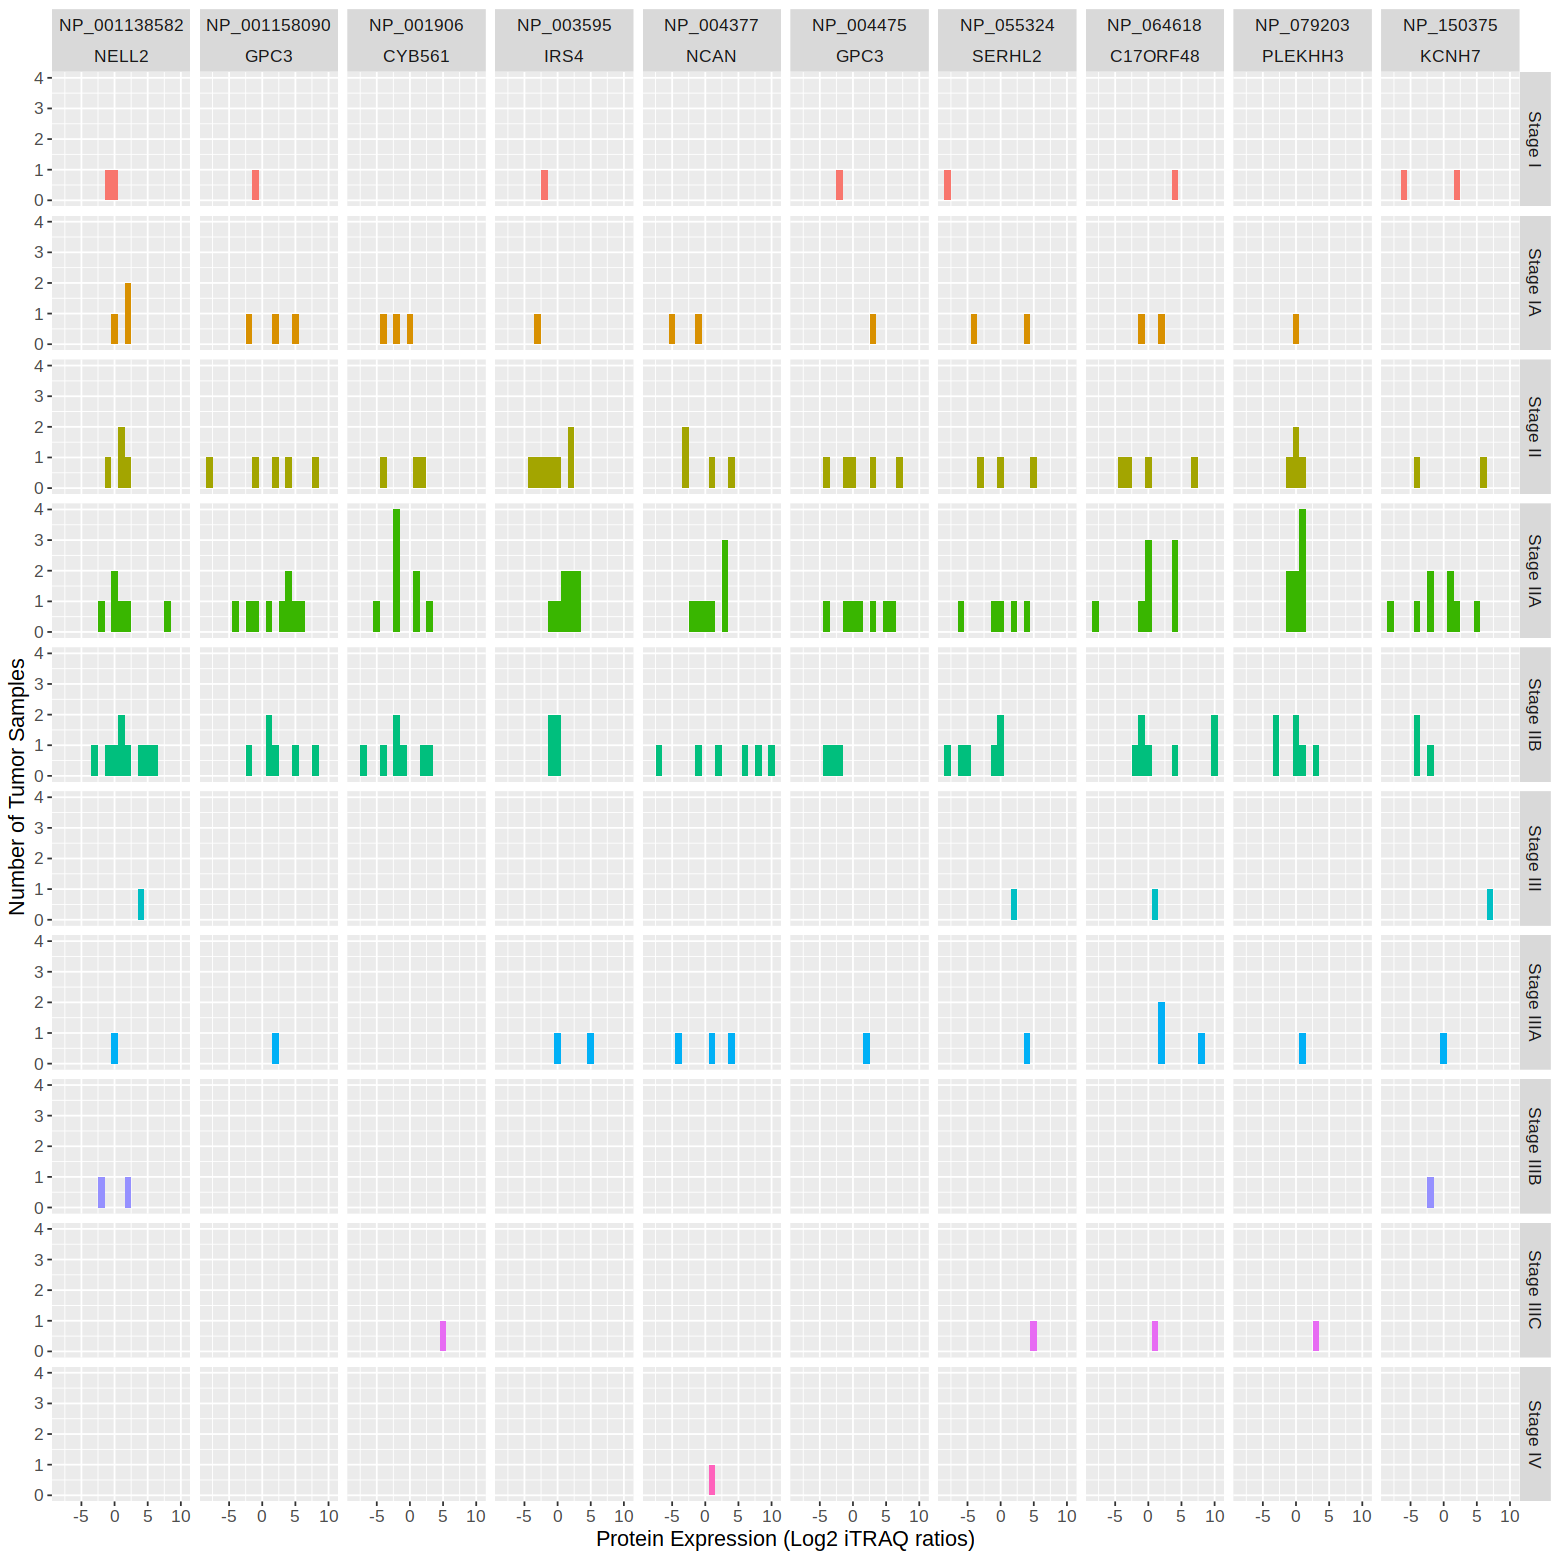

In [16]:
options(repr.plot.width = 13, repr.plot.height = 13)

expression_distribution_plot <- proteome_and_clinical_data_training_merged |>
    ggplot(aes(x = protein_expression_log2_iTRAQ_ratios, fill = ajcc_stage)) +
    geom_histogram(bins = 10, binwidth = 1) +
    facet_grid(rows = vars(ajcc_stage), cols = vars(RefSeq_accession_number, gene_symbol)) +
    labs(x = "Protein Expression (Log2 iTRAQ ratios)", y = "Number of Tumor Samples") +
    theme(text = element_text(size = 13)) +
    theme(legend.position = "none")
expression_distribution_plot

## Final Outputs: Data Exploration ## 

In [26]:
#patients_per_stage[order(as.character(patients_per_stage$ajcc_stage)),]
write.csv(patients_per_stage, "Proposal/Outputs/patients_per_stage.csv")
#patients_by_hormone_receptor_status
#patients_by_TNM_class
#expression_distribution_plot